### Influence and Deinfluence Analysis on Real-World Network

This Jupyter Notebook performs an influence and deinfluence analysis on an real network graph. The workflow includes loading the graph data, running influence cascade models, selecting deinfluencers, and plotting the results.

In [ ]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
model_code_dir = os.path.join(parent_dir, 'src')
if model_code_dir not in sys.path:
    sys.path.append(model_code_dir)

import exp_env as env
import copy
import pickle

# Load the graph from the file
save_path = '../network_data/email_eu_core_graph.gpickle'

# other networks:
# save_path = '../network_data/facebook.gpickle'
# save_path = '../network_data/wikivote.gpickle'
# save_path = '../network_data/ca-GrQc.gpickle'

try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from ../network_data/email_eu_core_graph.gpickle


In [2]:
# Set the parameters

graph_type = "email"
# graph_type only used for displaying the results, the real graph is loaded from the file

num_nodes = G.number_of_nodes()
influencers_cascade_steps = 3
num_influencers = 50
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10]  # Different values of k to test
general_cascade_steps = 2
num_avg_runs = 3
num_edges = G.number_of_edges()

# Construct the model 
model = env.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 770
Number of deinfluenced nodes: 0
Number of susceptible nodes: 235
influencer {641, 771, 774, 137, 905, 394, 524, 270, 144, 148, 790, 534, 918, 536, 925, 419, 555, 435, 54, 318, 580, 581, 971, 846, 719, 593, 340, 597, 343, 600, 219, 348, 475, 603, 607, 95, 224, 869, 618, 759, 493, 494, 751, 880, 881, 375, 633, 891, 127, 255}


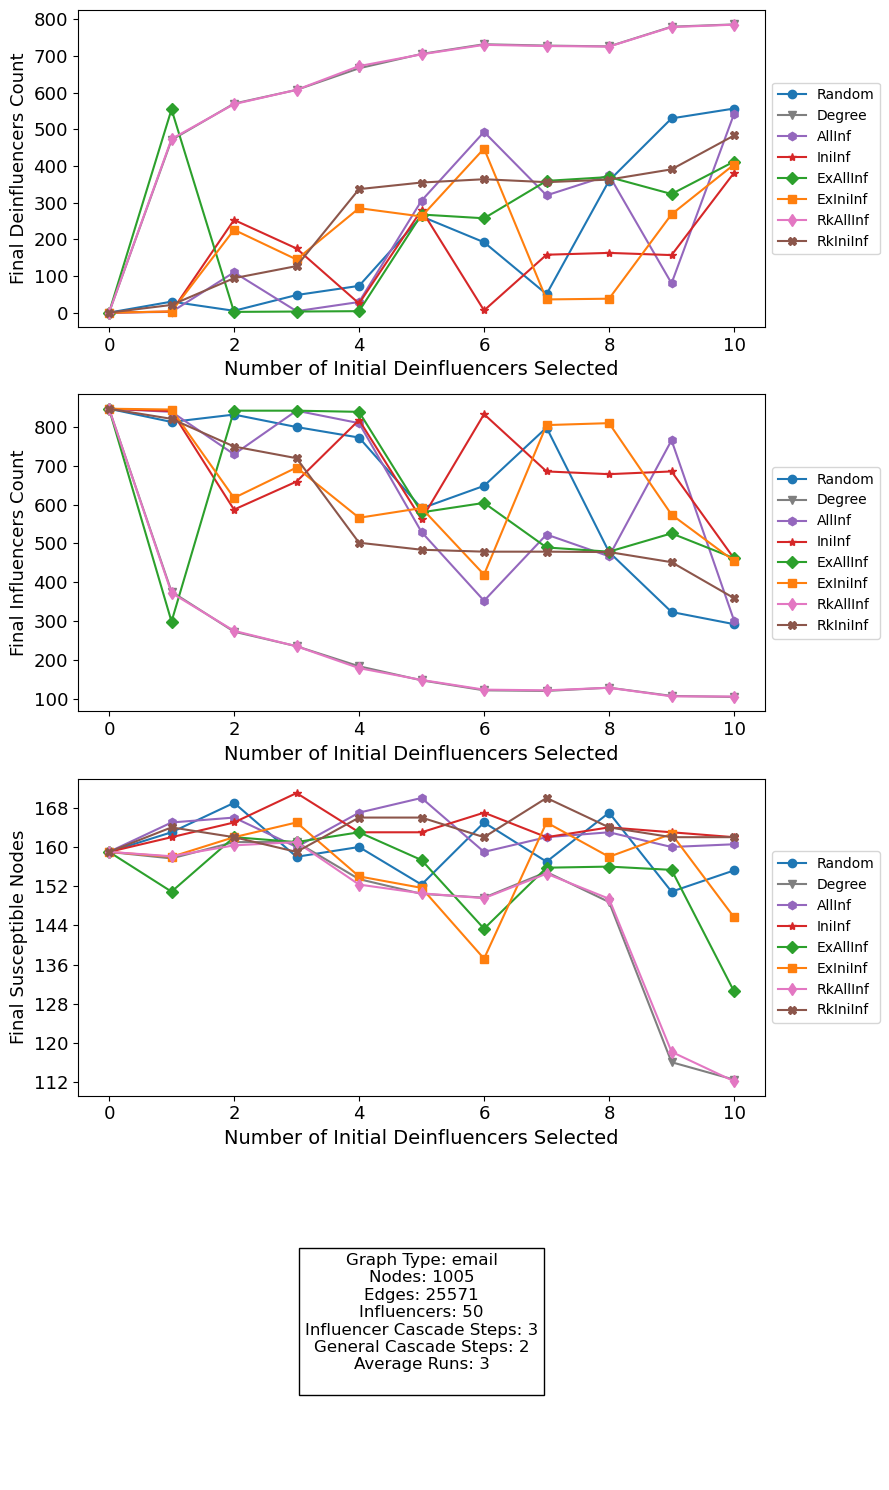

In [4]:
"""
This code block is used to evaluate the influence of the influencers on the graph based on the node criteria
"""
deinfluencers_list = env.select_deinfluencers_cri(k_deinfluencers_ls, model_fixed_influencers)
results = env.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)
env.plot_deinfluencer_results_new(results, G, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)